In [78]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Importação e visualização do banco de dados

In [79]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [80]:
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')

x_train = x_train/255
x_test = x_test/255

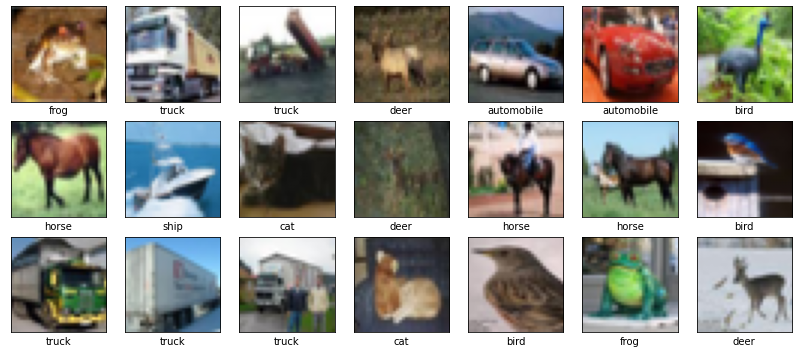

In [81]:
def show_pictures(x,y):
  y2 = pd.Series(y.flatten())
  y2 = y2.map({0: 'airplane', 
              1: 'automobile',
              2: 'bird',
              3: 'cat',
              4: 'deer',
              5: 'dog',
              6: 'frog',
              7: 'horse',
              8: 'ship',
              9: 'truck',})
  plt.figure(figsize=(14, 6))
  for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i])
    plt.xlabel(y2[i])
    #plt.title(y2[i])
  plt.show()

show_pictures(x_train,y_train)

# Criação da Rede Neural Convolucional

In [82]:
from tensorflow.keras import layers

model = tf.keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',
                  # [height, width, color channels(RGB)]
                  input_shape=[32, 32, 3]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=10, activation="sigmoid"),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [83]:
from tensorflow.keras.layers.experimental import preprocessing
model_aug = tf.keras.Sequential([
    layers.InputLayer(input_shape=[32, 32, 3]),
                                 
    # Data Augmentation
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),
    #preprocessing.RandomWidth(factor=0.3), # horizontal stretch
    #preprocessing.RandomHeight(factor=0.3), # vertical stretch

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=10, activation="sigmoid"),
])

model_aug.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Treinamento e Avaliação da CNN

In [85]:
history = model.fit(
    x_train, y_train_oh,
    validation_data=(x_test, y_test_oh),
    batch_size=256,
    epochs=50,
    callbacks=[early_stopping],
)

Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 0.2625 - accuracy: 0.4104 - val_loss: 0.6966 - val_accuracy: 0.1027
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 0.2007 - accuracy: 0.5538 - val_loss: 0.7465 - val_accuracy: 0.1070
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 0.1750 - accuracy: 0.6210 - val_loss: 0.4881 - val_accuracy: 0.2137
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 0.1586 - accuracy: 0.6631 - val_loss: 0.1835 - val_accuracy: 0.6094
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 0.1471 - accuracy: 0.6938 - val_loss: 0.2156 - val_accuracy: 0.5507
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 0.1376 - accuracy: 0.7136 - val_loss: 0.1447 - val_accuracy: 0.7037
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 0.1304 - accuracy: 0.7313 - val_loss: 0.1611 - val_accuracy: 0.6702

In [86]:
history_aug = model_aug.fit(
    x_train, y_train_oh,
    validation_data=(x_test, y_test_oh),
    batch_size=256,
    epochs=50,
    callbacks=[early_stopping],
)

Epoch 1/50
196/196 [==============================] - 5s 19ms/step - loss: 0.2663 - accuracy: 0.3854 - val_loss: 0.6306 - val_accuracy: 0.1086
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 0.2196 - accuracy: 0.4985 - val_loss: 0.8117 - val_accuracy: 0.1001
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 0.2033 - accuracy: 0.5449 - val_loss: 0.4907 - val_accuracy: 0.1692
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 0.1918 - accuracy: 0.5748 - val_loss: 0.2072 - val_accuracy: 0.5531
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 0.1823 - accuracy: 0.5991 - val_loss: 0.1826 - val_accuracy: 0.5999
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 0.1755 - accuracy: 0.6163 - val_loss: 0.2051 - val_accuracy: 0.5657
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 0.1693 - accuracy: 0.6331 - val_loss: 0.1550 - val_accuracy: 0.6727

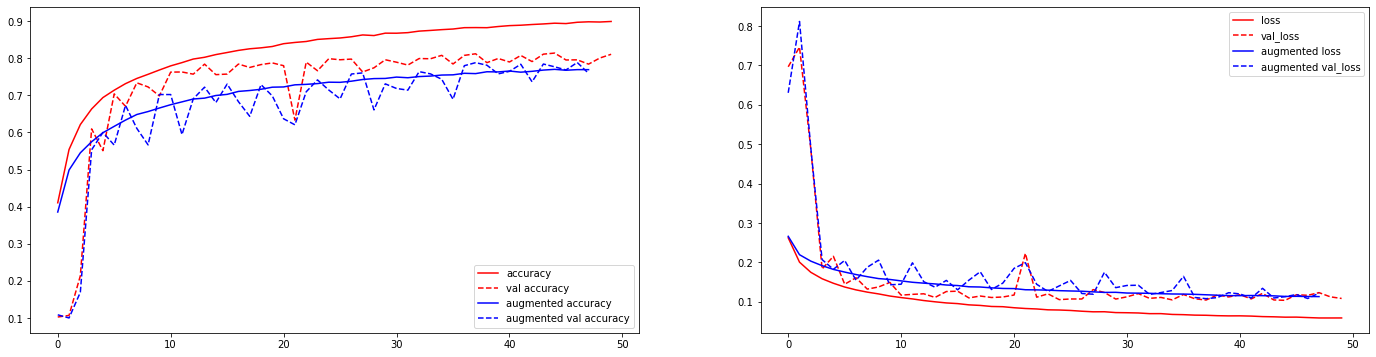

In [87]:
history_frame = pd.DataFrame(history.history)
history_aug_frame = pd.DataFrame(history_aug.history)


plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.plot(history_frame.index,history_frame.accuracy,'r-',label='accuracy')
plt.plot(history_frame.index,history_frame.val_accuracy,'r--',label='val accuracy')
plt.plot(history_aug_frame.index, history_aug_frame.accuracy,'b-',label='augmented accuracy')
plt.plot(history_aug_frame.index,history_aug_frame.val_accuracy,'b--',label='augmented val accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_frame.index,history_frame.loss,'r-',label='loss')
plt.plot(history_frame.index,history_frame.val_loss,'r--',label='val_loss')
plt.plot(history_aug_frame.index, history_aug_frame.loss,'b-',label='augmented loss')
plt.plot(history_aug_frame.index,history_aug_frame.val_loss,'b--',label='augmented val_loss')
plt.legend(loc='upper right')

plt.show()